In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Lenovo\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder

df.drop('customerID', axis=1, inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.dropna(subset=['TotalCharges'], inplace=True)
df.reset_index(drop=True, inplace=True)

le = LabelEncoder()
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df['gender'] = le.fit_transform(df['gender'])

df = pd.get_dummies(df, columns=[
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaymentMethod'
], drop_first=True)

print("Final dataset shape:", df.shape)
df.head()


Final dataset shape: (7032, 31)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


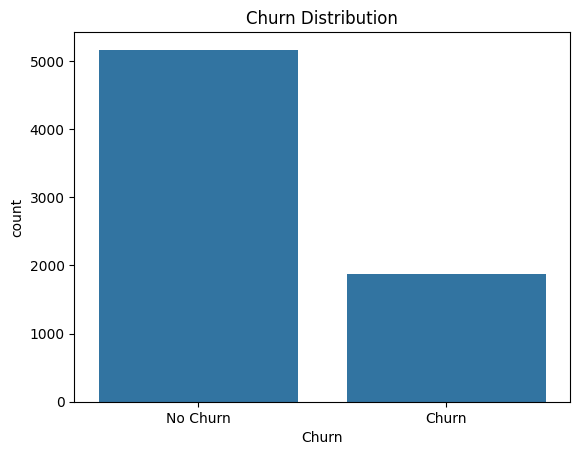

Churn rate: 26.58%


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

# Optional: See % churn
churn_rate = df['Churn'].mean()
print(f"Churn rate: {churn_rate:.2%}")


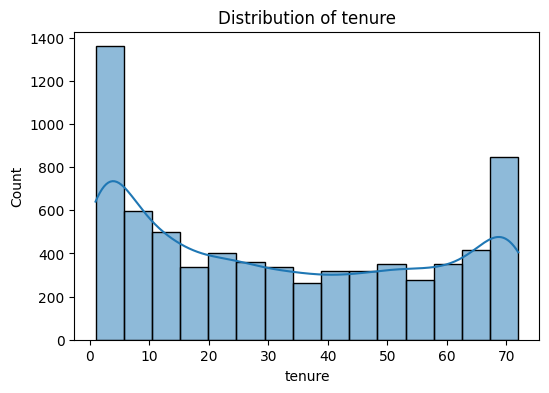

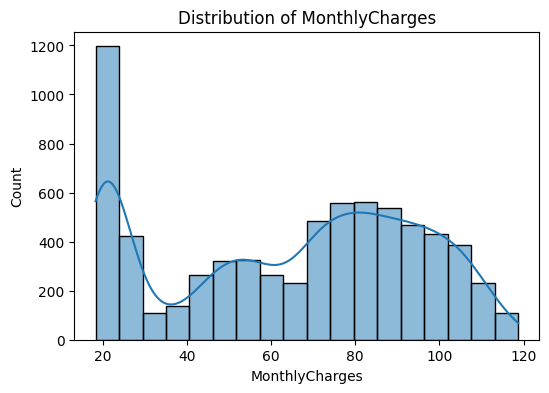

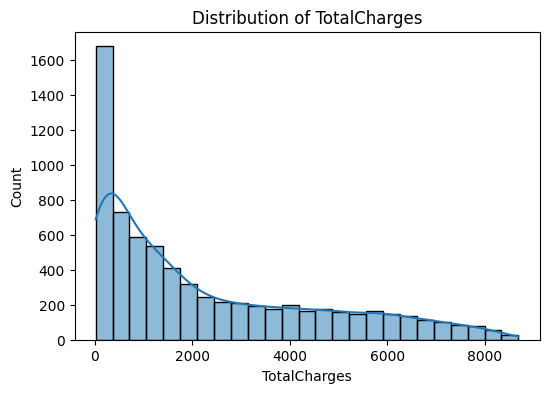

In [6]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


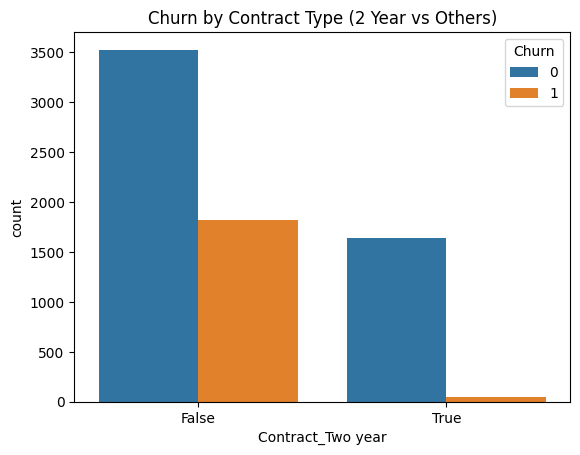

In [7]:
sns.countplot(x='Contract_Two year', hue='Churn', data=df)
plt.title("Churn by Contract Type (2 Year vs Others)")
plt.show()


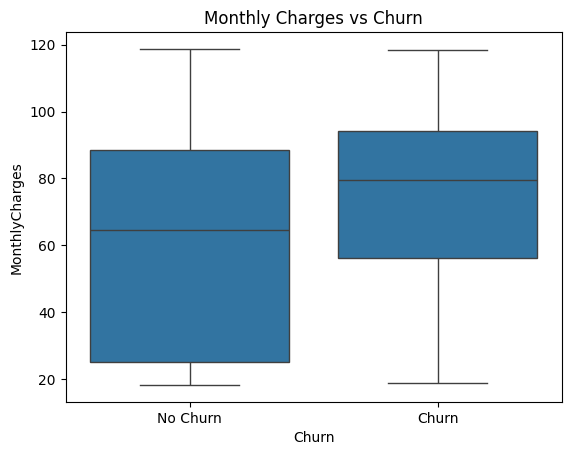

In [8]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()


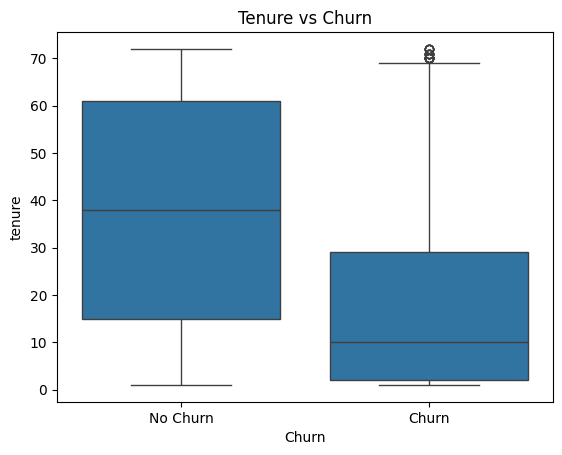

In [9]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()


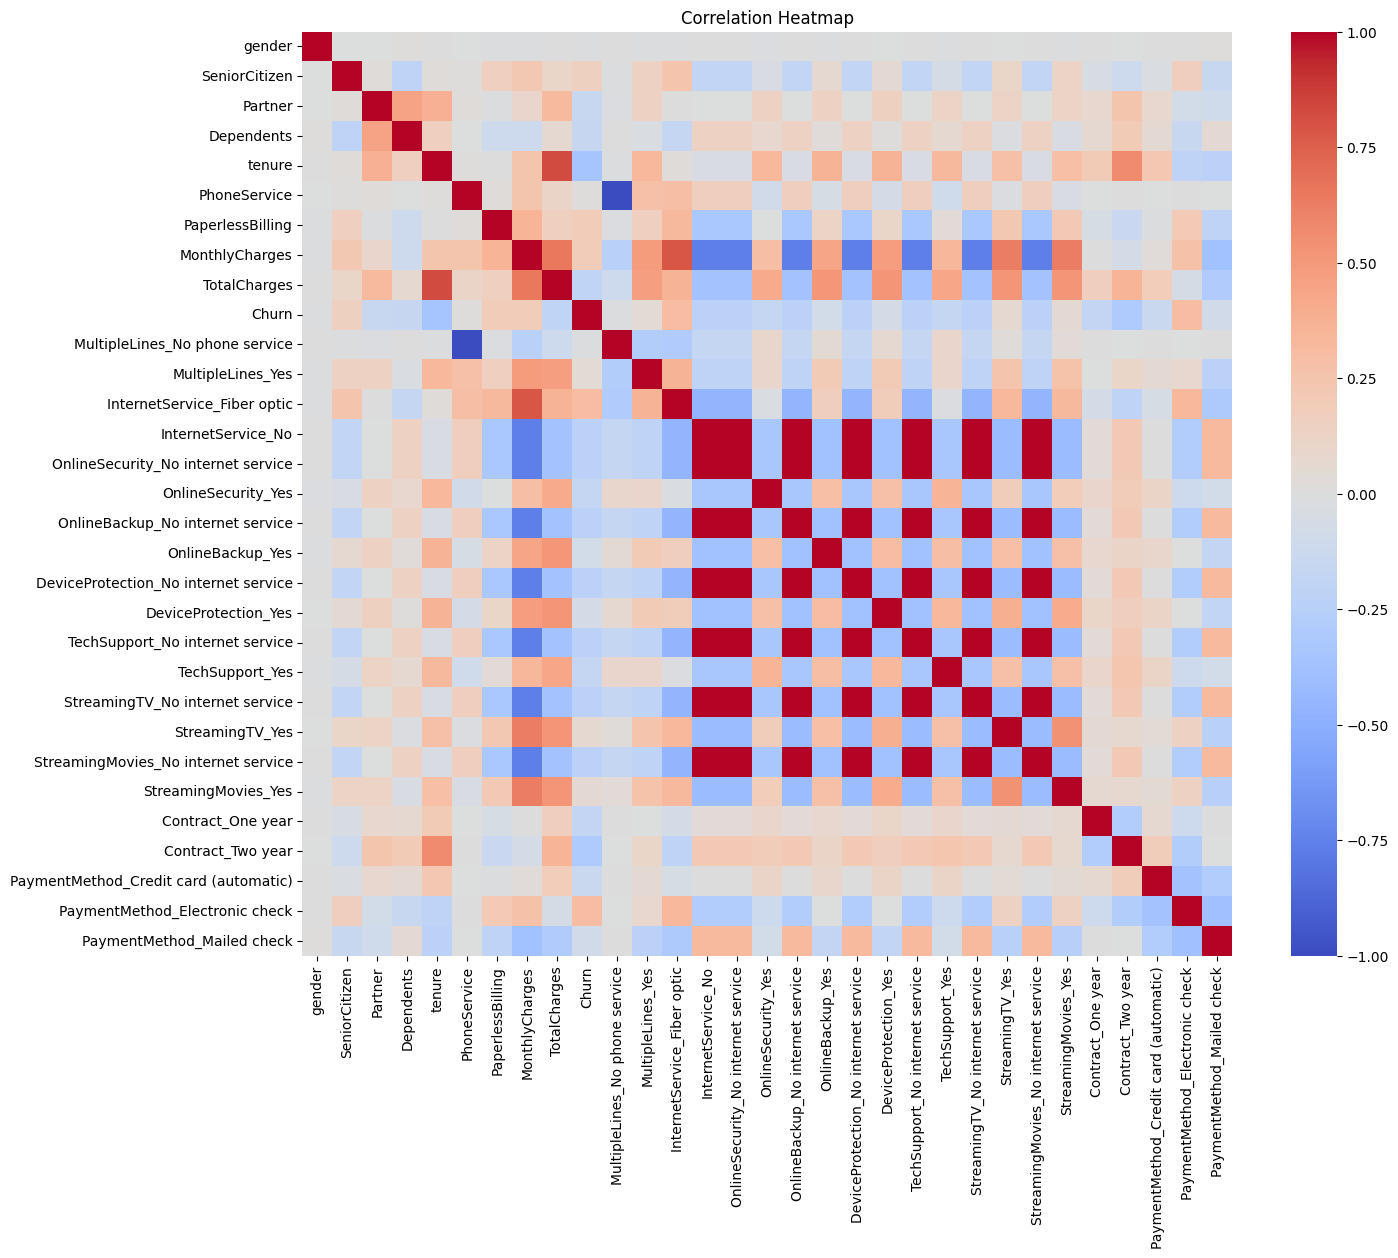

In [10]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())


Before SMOTE: Churn
0    4130
1    1495
Name: count, dtype: int64
After SMOTE: Churn
0    4130
1    4130
Name: count, dtype: int64


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

lr_sm = LogisticRegression(max_iter=1000)
lr_sm.fit(X_train_smote, y_train_smote)
y_pred_lr_sm = lr_sm.predict(X_test)

print("🔹 Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr_sm))
print("ROC-AUC:", roc_auc_score(y_test, lr_sm.predict_proba(X_test)[:, 1]))


🔹 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1033
           1       0.51      0.64      0.57       374

    accuracy                           0.74      1407
   macro avg       0.69      0.71      0.69      1407
weighted avg       0.77      0.74      0.75      1407

ROC-AUC: 0.8001058647519554


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_sm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sm.fit(X_train_smote, y_train_smote)
y_pred_rf_sm = rf_sm.predict(X_test)

print("🔹 Random Forest Results:")
print(classification_report(y_test, y_pred_rf_sm))
print("ROC-AUC:", roc_auc_score(y_test, rf_sm.predict_proba(X_test)[:, 1]))


🔹 Random Forest Results:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1033
           1       0.57      0.60      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.78      1407

ROC-AUC: 0.8082450264273623


In [15]:
import xgboost as xgb

xgb_sm = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_sm.fit(X_train_smote, y_train_smote)
y_pred_xgb_sm = xgb_sm.predict(X_test)

print("🔹 XGBoost Results:")
print(classification_report(y_test, y_pred_xgb_sm))
print("ROC-AUC:", roc_auc_score(y_test, xgb_sm.predict_proba(X_test)[:, 1]))


🔹 XGBoost Results:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1033
           1       0.55      0.58      0.56       374

    accuracy                           0.76      1407
   macro avg       0.69      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407

ROC-AUC: 0.8000877460902517


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [16]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, classification_report

# Helper function to evaluate any model
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n🔍 {name}")
    print("Accuracy     :", accuracy_score(y_true, y_pred))
    print("F1 Score     :", f1_score(y_true, y_pred))
    print("Recall (1)   :", recall_score(y_true, y_pred))
    print("ROC AUC      :", roc_auc_score(y_true, y_prob))
    print("------ Classification Report ------")
    print(classification_report(y_true, y_pred))

# SMOTE Models
evaluate_model("Logistic Regression (SMOTE)", y_test, y_pred_lr_sm, lr_sm.predict_proba(X_test)[:,1])
evaluate_model("Random Forest (SMOTE)", y_test, y_pred_rf_sm, rf_sm.predict_proba(X_test)[:,1])
evaluate_model("XGBoost (SMOTE)", y_test, y_pred_xgb_sm, xgb_sm.predict_proba(X_test)[:,1])



🔍 Logistic Regression (SMOTE)
Accuracy     : 0.7434257285003554
F1 Score     : 0.5697258641239571
Recall (1)   : 0.6390374331550802
ROC AUC      : 0.8001058647519554
------ Classification Report ------
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1033
           1       0.51      0.64      0.57       374

    accuracy                           0.74      1407
   macro avg       0.69      0.71      0.69      1407
weighted avg       0.77      0.74      0.75      1407


🔍 Random Forest (SMOTE)
Accuracy     : 0.7732764747690121
F1 Score     : 0.5840938722294654
Recall (1)   : 0.5989304812834224
ROC AUC      : 0.8082450264273623
------ Classification Report ------
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1033
           1       0.57      0.60      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
w

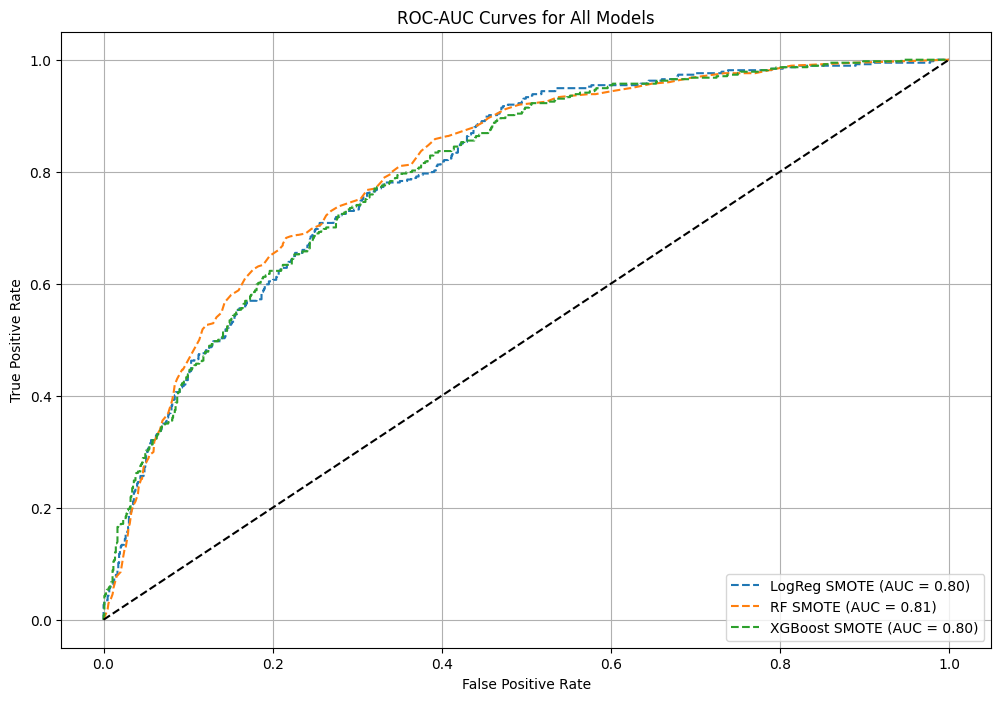

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# SMOTE Models
fpr_lr_sm, tpr_lr_sm, _ = roc_curve(y_test, lr_sm.predict_proba(X_test)[:,1])
fpr_rf_sm, tpr_rf_sm, _ = roc_curve(y_test, rf_sm.predict_proba(X_test)[:,1])
fpr_xgb_sm, tpr_xgb_sm, _ = roc_curve(y_test, xgb_sm.predict_proba(X_test)[:,1])


plt.plot(fpr_lr_sm, tpr_lr_sm, linestyle='--', label=f'LogReg SMOTE (AUC = {auc(fpr_lr_sm, tpr_lr_sm):.2f})')
plt.plot(fpr_rf_sm, tpr_rf_sm, linestyle='--', label=f'RF SMOTE (AUC = {auc(fpr_rf_sm, tpr_rf_sm):.2f})')
plt.plot(fpr_xgb_sm, tpr_xgb_sm, linestyle='--', label=f'XGBoost SMOTE (AUC = {auc(fpr_xgb_sm, tpr_xgb_sm):.2f})')

# Random Guess line
plt.plot([0, 1], [0, 1], 'k--')

# Format the plot
plt.title("ROC-AUC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [21]:
from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)

# Save Random Forest
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_sm, f)

# Save Logistic Regression
with open("log_model.pkl", "wb") as f:
    pickle.dump(lr_sm, f)

# Save XGBoost
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_sm, f)

# Save Scaler (used for Logistic Regression)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [23]:
df.to_csv('final.csv', index = False)